**개요 :** 알코올, 도수, pH 데이터를 기준으로 화이트 와인을 골라내는 이진 분류 로지스틱 회귀 모델을 훈련했지만 이해하기 힘들었다.   
결정 트리의 성능이 로지스틱 회귀 모델보다 더 좋았다. 또한 결정 트리의 깊이가 너무 기지 않다면 비교적 설명하기 쉬웠다. 또 결정 트리가 어떻게 데이터를 분할하는지 이해하기 위해 불순도 개념과 정보 이득에 대해 알아보았다.

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)   # 테스트 케이스를 20%로 나눔

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [11]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


### **결정 트리(Decision Tree)**
결정 트리 모델은 이유를 설명하기 쉽다.

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8584615384615385


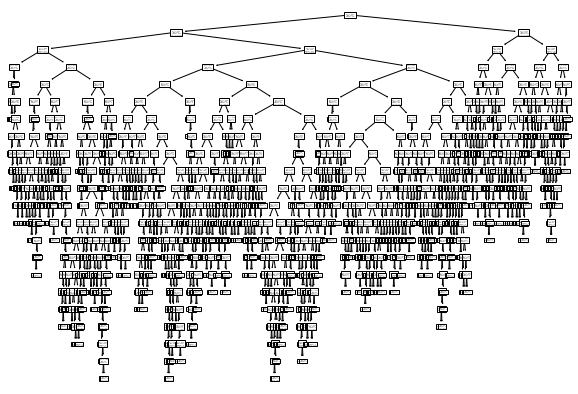

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

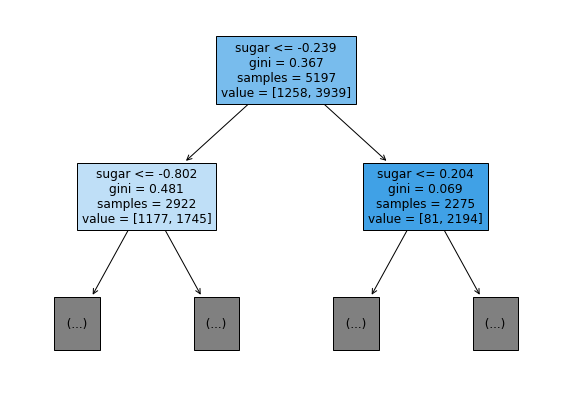

In [17]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

당도가 주어진 값보다 작거나 같다 가 참이면 왼쪽으로, 거짓이면 오른쪽으로 가지가 뻗는다. plot_tree()함수에서 filled=True 로 지정하면 클래스마다 색깔을 부여하고, 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시한다.

### **불순도**
gini 는 **지니 불순도(Gini impurity)**를 의미한다.   

$$지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)$$   

결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킨다.   
부모와 자식 노드 사이의 불순도 차이를 **정보 이득(information gain)** 이라고 부른다. 

### **가지치기**
결정 트리를 가지치기 하는 이유는 가지치기를 하지 않으면 무작정 끝까지 자라나는 트리가 만들어지기 때문이다. 훈련 세트에는 잘 맞겠지만 테스트 세트에서 점수는 그에 못 미칠 것이다. 이를 두고 일반화가 잘 안되었다고 말한다.

In [18]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


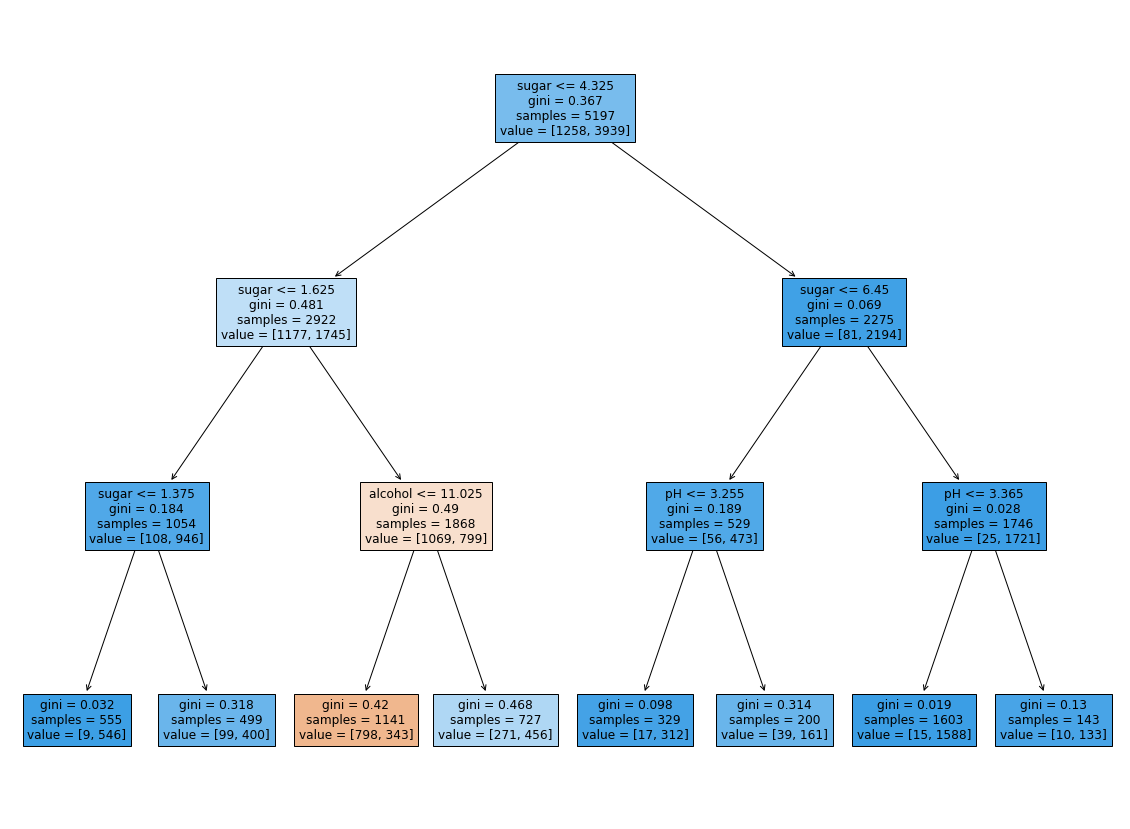

In [25]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않는다. 따라서 표준화 전처리를 할 필요가 없다. 이것은 결정 트리 알고리즘의 장점 중 하나이다.

In [21]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))  

0.8454877814123533
0.8415384615384616


전처리 전 데이터와 전처리 후 데이터가 정확히 일치하는것을 볼 수 있다.

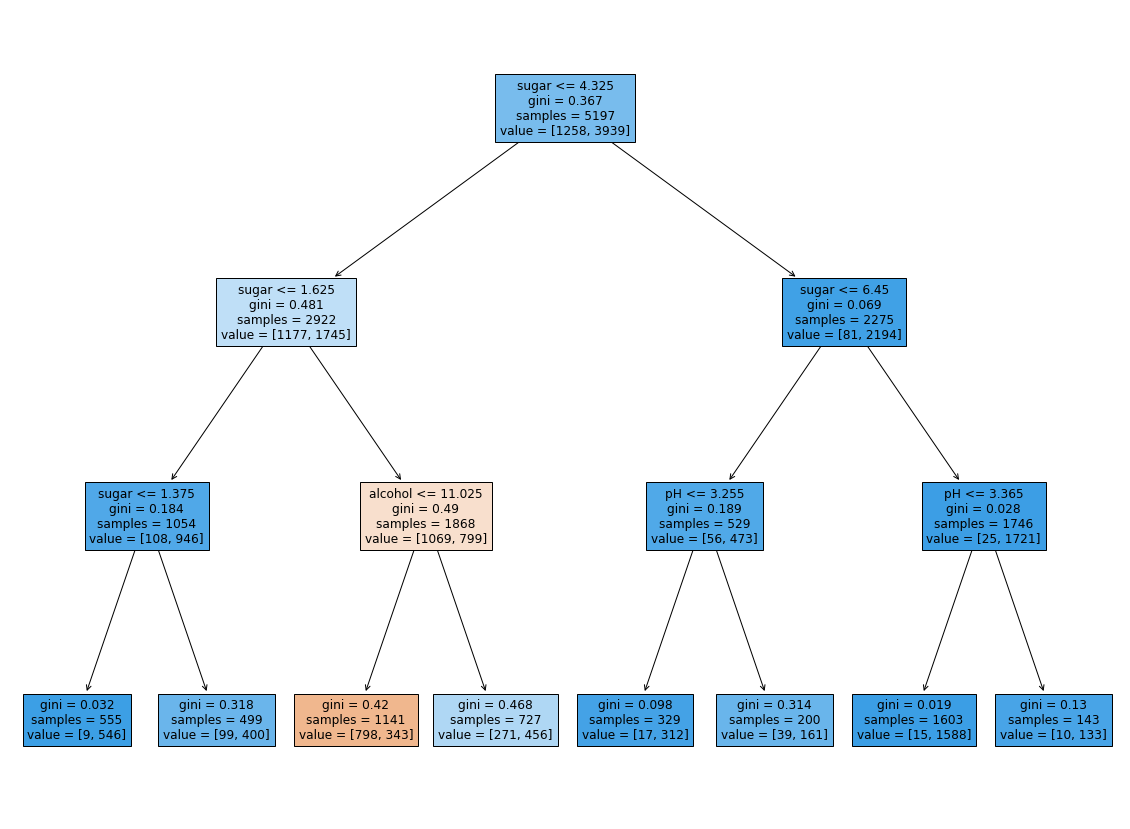

In [22]:
from numpy.ma.core import filled
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

결과를 보면 같은 트리지만, 특성값을 표준점수로 바꾸지 않았기 때문에 이해가 훨씬 쉽다.

In [23]:
print(dt.feature_importances_)    # 어떤 특성이 가장 유용한지 나타내는 특성 중요도를 계산해 준다.

[0.12345626 0.86862934 0.0079144 ]


특성 중요도를 활용하면 결정 트리 모델의 특성 선택에 도움을 줄 수 있다. 이는 결정 트리 알고리즘의 또다른 장점 중 하나이다.